## Features Comparison Notebook

---

### Objective:

- To assess the impact of different features on the performance of the model.
- To determine the optimal features for the model.

### Methodology:

- A model (RF, SVM, LR) is trained with different features (Chroma, MFCC_30, MFCC_120, CQT_30, CQT_70). The features are used 'as extracted' without any additional processing.
- The model is trained with 80% of the data and tested with the remaining 20%.

#### Findings:

All types of features are highly predictive

| Type                | N° Features |
| ------------------- | ---------- |
| MFCC                | 30         |
| CQT                 | 70         |
| Chroma              | 12         |
| RMS                 | 40         |
| Zero Crossing Rates | 40         |
| Spectral Centroid   | 40         |
| Spectral Bandwidth  | 60         |
| Spectral Rolloff    | 40         |


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tqdm.notebook as tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")
import seaborn as sns

sns.set_theme(context="paper", font_scale=1)

In [10]:
# set the paths
BASE_DIR = "../../dataset/"
LABELS = BASE_DIR + "labels.csv"

# features
FEATURES_BASE = "../../features/"
FEATURES = FEATURES_BASE + "raw/"

# Models
MODELS = "../../models/"
MODELS_RESULTS = MODELS + "results/"

# report
PAPER = "../../paper/"
IMAGES_PATH = PAPER + "images/"

# HYERPARAMETERS
SEED = 42
INTERVAL = 2

RESULT_NAME = "results_features_comparison.csv"
COMPLETE_DATASET = "full_data_1s_4000hz_30mfcc_70cqt_12chroma.npy"

In [11]:
# -----------------------------------------Constants-----------------------------------------
SEED = 42
full_data_dict_keys = ["artifacts", "extrahls", "murmurs", "normals", "extrastoles"]
interval = INTERVAL  # You need to define INTERVAL somewhere
sample_rates = ["mix", 4000]
num_feats = {
    "30 MFCC": "30mfcc",
    "60 MFCC": "60mfcc",
    "90 MFCC": "90mfcc",
    "120 MFCC": "120mfcc",
    "12  Chroma": "12chroma",
    "20 CQT": "20cqt",
    "30 CQT": "30cqt",
    "40 CQT": "40cqt",
    "60 CQT": "60cqt",
    "70 CQT": "70cqt",
    "20 RMS": "20rms",
    "40 RMS": "40rms",
    "60 RMS": "60rms",
    "20 Zero Crossing Rates": "21zcr",
    "40 Zero Crossing Rates": "41zcr",
    "60 Zero Crossing Rates": "61zcr",
    "20 Spectral Centroid": "21sc",
    "40 Spectral Centroid": "41sc",
    "60 Spectral Centroid": "61sc",
    "20 Spectral Bandwidth": "21sb",
    "40 Spectral Bandwidth": "41sb",
    "60 Spectral Bandwidth": "61sb",
    "20 Spectral Rolloff": "21sr",
    "40 Spectral Rolloff": "41sr",
    "60 Spectral Rolloff": "61sr",
}


# ----------------------------------------- Create DataFrame to store results-----------------------------------------
result_df = pd.DataFrame(
    columns=num_feats.keys(),
    index=["Random Forest", "SVM", "Logistic Regression"],
)

# ----------------------------------------- Loop over each feature-----------------------------------------
for name,num_feat in num_feats.items():
    print(f"Processing 4000hz_{num_feat}\n")

    # Load the data
    FEATURES_NAME = f"full_data_{interval}s_4000hz_{num_feat}.npy"
    full_data = np.load(FEATURES + FEATURES_NAME, allow_pickle=True).item()

    # Extract data from the dictionary
    data_list = []
    for key in full_data_dict_keys:
        X = full_data[key]["X"]
        y = full_data[key]["y"]
        data = np.concatenate((X, y.reshape(-1, 1)), axis=1)
        data_list.append(data)
    full_data_array = np.concatenate(data_list, axis=0)

    # Split the data into train and test
    X = full_data_array[:, :-1]
    y = full_data_array[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED
    )

    # Train and evaluate models: Random Forest, SVM, Logistic Regression
    for model_name, clf in {
        "Random Forest": RandomForestClassifier(random_state=SEED),
        "SVM": SVC(random_state=SEED),
        "Logistic Regression": LogisticRegression(random_state=SEED, max_iter=1000),
    }.items():
        print(f"Training {model_name}\n")
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        result_df.loc[model_name, name] = score

# ----------------------------------------- Save the results-----------------------------------------
result_df.to_csv(MODELS_RESULTS + RESULT_NAME)
result_df

Processing 4000hz_30mfcc

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_60mfcc

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_90mfcc

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_120mfcc

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_12chroma

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_20cqt

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_30cqt

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_40cqt

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_60cqt

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_70cqt

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_20rms

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_40rms

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_60rms

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_21zcr

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_41zcr

Training Random Forest

Training SVM

Trai

/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_41sc

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_61sc

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_21sb

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_41sb

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_61sb

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_21sr

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_41sr

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_61sr

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,30 MFCC,60 MFCC,90 MFCC,120 MFCC,12 Chroma,20 CQT,30 CQT,40 CQT,60 CQT,70 CQT,...,60 Zero Crossing Rates,20 Spectral Centroid,40 Spectral Centroid,60 Spectral Centroid,20 Spectral Bandwidth,40 Spectral Bandwidth,60 Spectral Bandwidth,20 Spectral Rolloff,40 Spectral Rolloff,60 Spectral Rolloff
Random Forest,0.864662,0.849624,0.851504,0.842105,0.699248,0.721805,0.757519,0.74812,0.783835,0.795113,...,0.701128,0.759398,0.763158,0.75188,0.753759,0.765038,0.772556,0.766917,0.774436,0.74812
SVM,0.778195,0.780075,0.780075,0.780075,0.676692,0.703008,0.708647,0.716165,0.725564,0.763158,...,0.578947,0.68797,0.646617,0.637218,0.714286,0.725564,0.723684,0.652256,0.62782,0.631579
Logistic Regression,0.759398,0.763158,0.781955,0.785714,0.607143,0.648496,0.646617,0.646617,0.659774,0.682331,...,0.558271,0.580827,0.554511,0.522556,0.533835,0.511278,0.5,0.552632,0.516917,0.496241


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0, 0.5, '30 MFCC'),
  Text(0, 1.5, '60 MFCC'),
  Text(0, 2.5, '90 MFCC'),
  Text(0, 3.5, '120 MFCC'),
  Text(0, 4.5, '12  Chroma'),
  Text(0, 5.5, '20 CQT'),
  Text(0, 6.5, '30 CQT'),
  Text(0, 7.5, '40 CQT'),
  Text(0, 8.5, '60 CQT'),
  Text(0, 9.5, '70 CQT'),
  Text(0, 10.5, '20 RMS'),
  Text(0, 11.5, '40 RMS'),
  Text(0, 12.5, '60 RMS'),
  Text(0, 13.5, '20 Zero Crossing Rates'),
  Text(0, 14.5, '40 Zero Crossing Rates'),
  Text(0, 15.5, '60 Zero Crossing Rates'),
  Text(0, 16.5, '20 Spectral Centroid'),
  Text(0, 17.5, '40 Spectral Centroid'),
  Text(0, 18.5, '60 Spectral Centroid'),
  Text(0, 19.5, '20 Spectral Bandwidth'),
  Text(0, 20.5, '40 Spectral Bandwidth'),
  Text(0, 21.5, '60 Spectral Bandwidth'),
  Text(0, 22.5, '20 Spectral Rolloff'),
  Text(0, 23.5, '40 Spectral Rolloff'),
  Text(0, 24.5, 

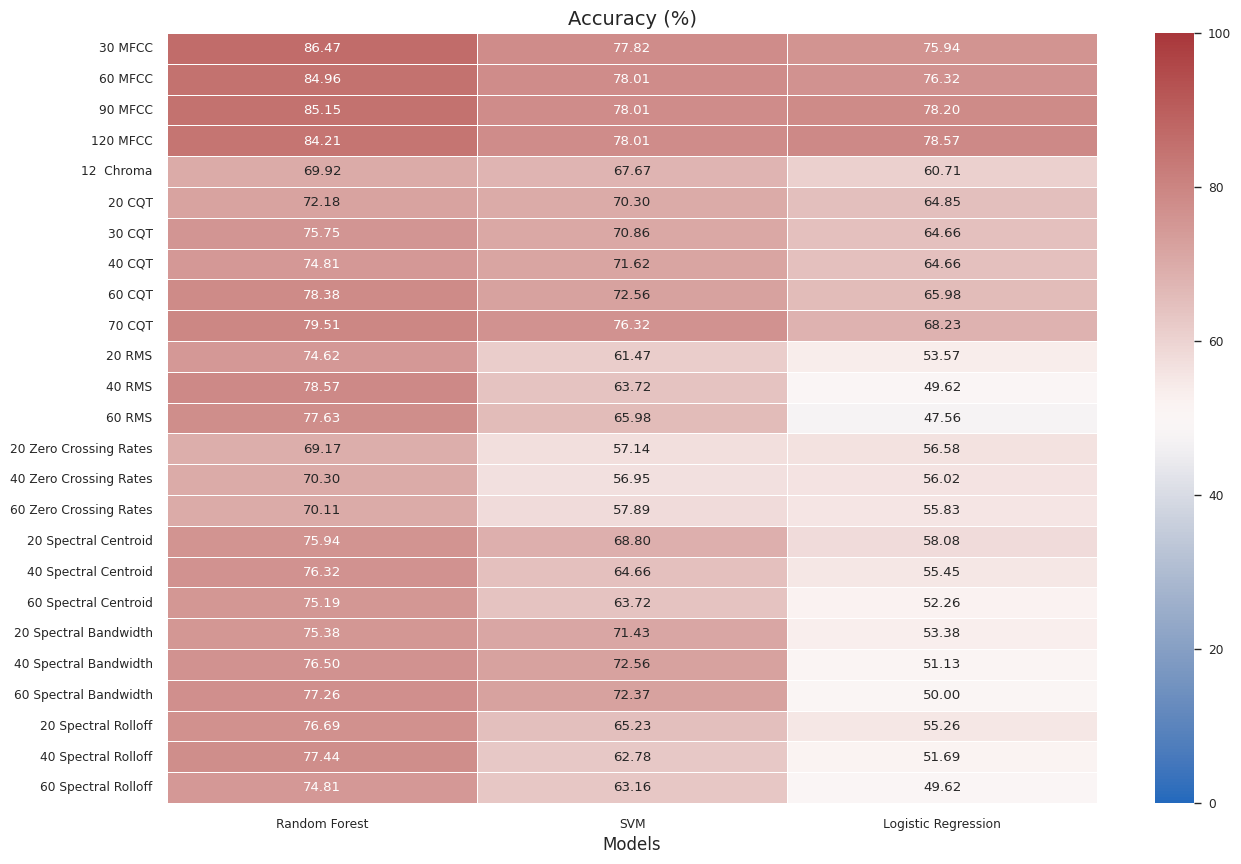

In [14]:
result_df = pd.read_csv(MODELS_RESULTS + RESULT_NAME, index_col=0).transpose()

plt.figure(figsize=(15, 10))
sns.set_theme(context="paper", font_scale=1)

sns.heatmap(result_df.astype(float) * 100, annot=True, cmap="vlag", fmt=".2f",vmax=100,vmin=0,linewidths=0.5)
plt.title("Accuracy (%)", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.yticks(rotation=0)